# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns
sns.set()

In [11]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [12]:
# deal with missing and inconvenient portions of data 

clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'][hospital_read_df['Number of Discharges'] != '0']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\sirro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


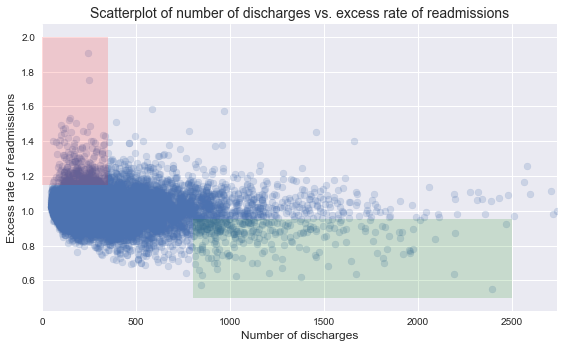

In [19]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [20]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [21]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [55]:
a = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio']
print('In hospitals/facilities with number of discharges < 100, mean excess readmission rate is', round(np.mean(a),3), 'and', round(sum(a > 1)/len(a)*100), 'have excess readmission rate greater than 1')

b = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio']
print('In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is', round(np.mean(b),3), 'and', round(sum(b > 1)/len(b)*100), 'have excess readmission rate greater than 1')


In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63 have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44 have excess readmission rate greater than 1


The initial observations based on the plot cannot be arrived at by just just a visual inspection, the conclusions are unfounded. The statistics were correct however the regulatory policy recommendations cannot be considerated valid based on the conclusions derived from a visual analysis. 

**1. Setup an appropriate hypothesis test.** <br>
H<sub>O</sub>; There is no linear relationship between the number of discharges and excess rate of readmission. <br>
H<sub>A</sub>; There is a linear relationship between the number of discharge and excess rate of readmission. 

**2. Compute and report the observed significance value (or p-value).**<br>
**3. Report statistical significance for  α  = .01.**

In [54]:
#Determine the regression analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('The correlation coefficient of our observed data is r =', round(r_value, 3), 'and the p-value is p =', round(p_value, 3))

The correlation coefficient of our observed data is r = -0.089 and the p-value is p = 0.0


The data provides extremely strong evidence (p = 0.0) at a statistical significance of $\alpha$ = 0.01 of a very weak linear relationship (r = -0.089) between number of discharges and excess rate of readmission in the data.

**4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

Statistical signficance establishes the exsistence of at effect while practical significance addresses the magnetude of the effect. Statistical significants can exist without practical significance. 

**Recommendation**
+ An estensive study of the operating procedures of hospitals with excess readmission rates below 0.8 should be done for similar and unique policies to determine the underlining variables that contributes to the low rates. Variables to consider should not only be limited to professional development cycle for staff, patient syptoms, diease/sickness diagnosis, length of stay, and the number and types of evaluations. 

**5. Look at the scatterplot above.**<br>
- What are the advantages and disadvantages of using this plot to convey information?<br>
- Construct another plot that conveys the same information in a more direct manner.

**Advantages** 
+ Show a relationship or trend in the data relationship.
+ Plots all data points (minimum, maximum and outliers).
+ Highlight correlations.
+ Shows positive and negative correlation.

**Disadvantages**
+ Best fit line gives inconclusive results.
+ Graphical interpretation can be subjective.
+ Correlation does not mean causation.
+ You cannot use scatter diagrams to show the relation of more than two variables.

C:\Users\sirro\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sirro\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


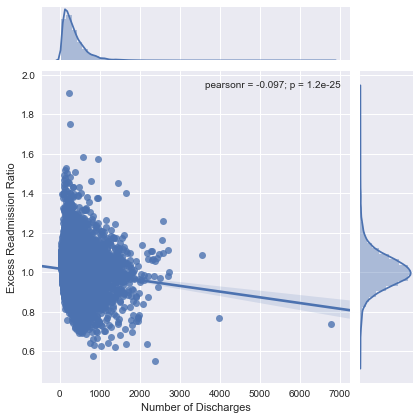

In [18]:
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df, kind='reg')
plt.show()

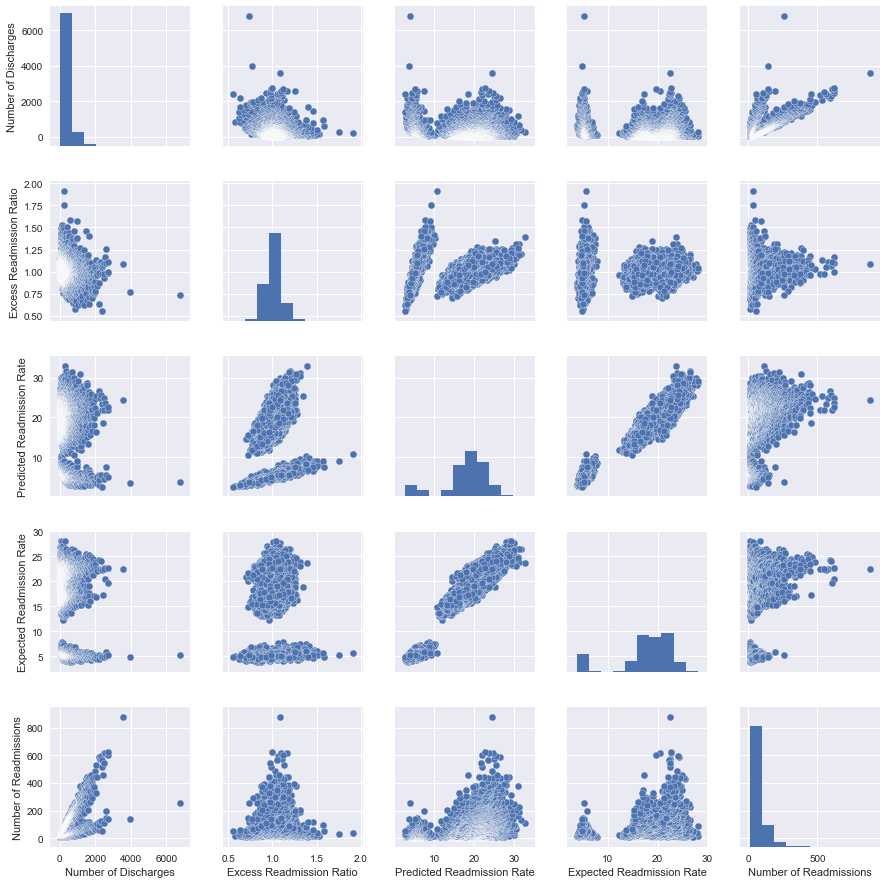

In [30]:
#Pairplot to visually inspect the relationship between the quantitative variables.
sns.pairplot(clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions']])
plt.show()

C:\Users\sirro\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sirro\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


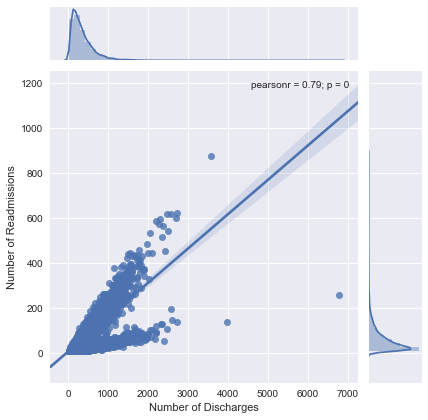

In [45]:
#Jointplot of number of discharges and number of readmissions. 
sns.jointplot(x='Number of Discharges', y='Number of Readmissions', data=clean_hospital_read_df, kind='reg')
plt.show()

In [48]:
#Determine the regression analysis
m, b, r, p, s = stats.linregress(clean_hospital_read_df['Number of Discharges'],clean_hospital_read_df['Number of Readmissions'])
print('The correlation coefficient of our observed data is r =', round(r,3), 'and the p-value is p =', p)

The correlation coefficient of our observed data is r = 0.791 and the p-value is p = 0.0


There seems to be correlation between the number of discharges and the number of readmission. This result is expected since the greater the number of discharges the greater the chance of readmissions, to some degree this can be consdered the law of numbers. It is unclear how the Excess Readmission Ratio, Predicted Readmission Rate, and Expected Readmission Rate values were calculated. Therefore an indept analysis may not be possible to identfy any causal variable that may result in a higher possibility for a patient. 